# Simple convolution neural network MNIST digits classification with Keras and Tensorflow

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Keras (from TensorFlow) imports for the dataset and building NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.backend import image_data_format
from tensorflow.keras.regularizers import l2

In [2]:
# load train/test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

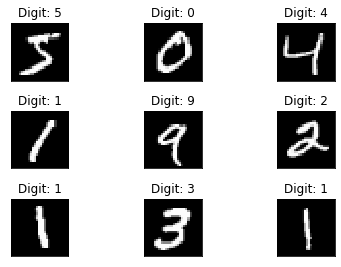

In [3]:
# Draw first several figures
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

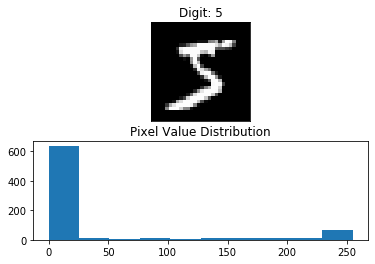

In [4]:
# Draw pixel distribution of the first train digit
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# get input shape
if image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


# normalize train/test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert train/test output data into categories
num_classes = 10
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

Y_train: (60000, 10)
Y_test: (10000, 10)


In [9]:
# more info: https://keras.io/examples/mnist_cnn/
# https://github.com/AmmirMahdi/mnist-with-Keras---Conv2D/blob/master/Deep_Learning_mnist_with_Conv2D.ipynb

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.15))

#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.15))

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [13]:
# train NN
batch_size = 128
# adapt number of iterations
epochs = 20

history = model.fit(X_train, Y_train,
          batch_size=128,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 57s 950us/sample - loss: 7.0288 - accuracy: 0.8852 - val_loss: 6.9136 - val_accuracy: 0.9095
Epoch 2/20
60000/60000 [==============================] - 57s 948us/sample - loss: 6.9286 - accuracy: 0.8855 - val_loss: 6.8147 - val_accuracy: 0.9095
Epoch 3/20
60000/60000 [==============================] - 58s 974us/sample - loss: 6.8287 - accuracy: 0.8875 - val_loss: 6.7171 - val_accuracy: 0.9101
Epoch 4/20
60000/60000 [==============================] - 58s 966us/sample - loss: 6.7347 - accuracy: 0.8863 - val_loss: 6.6216 - val_accuracy: 0.9103
Epoch 5/20
60000/60000 [==============================] - 65s 1ms/sample - loss: 6.6374 - accuracy: 0.8880 - val_loss: 6.5274 - val_accuracy: 0.9109
Epoch 6/20
60000/60000 [==============================] - 82s 1ms/sample - loss: 6.5438 - accuracy: 0.8884 - val_loss: 6.4346 - val_accuracy: 0.9115
Epoch 7/20
60000/60000 [========================

In [14]:
# evaluate NN model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.286352462005615
Test accuracy: 0.9165


In [15]:
# save data (optionally)
import os

save_dir = "results/"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# saving the model
model_name = 'keras_mnist_with_cnn_v1.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist_with_cnn_v1.h5 


In [16]:
# restore data from file (optional)
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

10000/1 - 5s - loss: 5.2389 - accuracy: 0.9165
Test Loss 5.286352462005615
Test Accuracy 0.9165


In [17]:
# see which we predicted correctly and which not
predicted_classes = mnist_model.predict_classes(X_test)
print("predicted_classes:", predicted_classes.shape)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

predicted_classes: (10000,)
9165  classified correctly
835  classified incorrectly


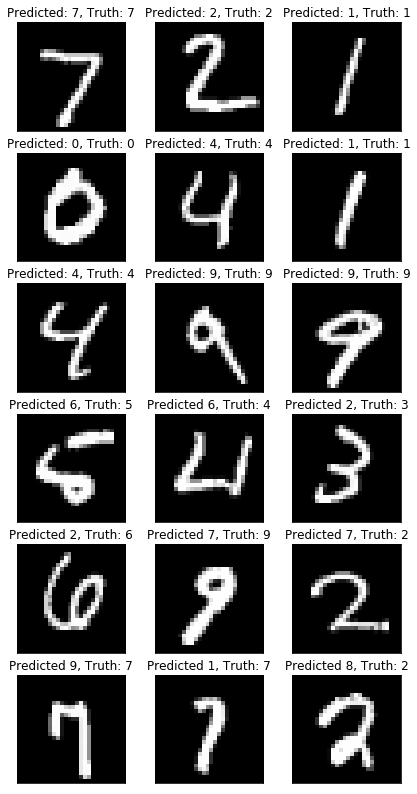

In [20]:
# show 9 correctly and 9 incorrectly classified digits
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])